### 7.2 不偏推定量
#### 【趣旨】標本から母数（母平均/母分散 etc.）を推定する：demonstration
>以下の話は、母集団と標本それぞれの統計量と、その間の関係を示す最も基本となるもの。   
>しっかりとやっていることの意味を理解すること！！！  

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import randint

In [2]:
# 0-9の乱数を20個生成（母集団(size=20)を作成）
a = randint(0,10,20)
print("母集団 =", a)
p_mean = np.mean(a)
p_var = np.var(a, ddof=0)  #ddof=0: 標本分散（nで割る）
print(f"母平均: {p_mean:5.3f} / 母分散: {p_var:5.3f}")

母集団 = [5 6 9 5 6 2 5 9 1 7 4 5 0 2 7 9 3 8 3 7]
母平均: 5.150 / 母分散: 6.927


In [3]:
# 標本抽出（手動で何度か実行せよ）
sample_num = 5
sample = np.random.choice(a,sample_num)
print(sample)
print("mean:",np.mean(sample))

[5 7 2 6 3]
mean: 4.6


In [4]:
# 標本抽出
sample_mean=[]
sample_Uvar=[]
sample_var=[]

# size20の母集団から、5つランダムに取り出して標本とする操作を1000回繰り返す
for k in range(1000):
    sample = np.random.choice(a,5)
    s_ave = np.mean(sample)
    s_var = np.var(sample, ddof=0)   # ddof=0: 標本分散（nで割る）
    U_var = np.var(sample, ddof=1)   # ddof=1: 不偏分散（n-1で割る）
    if k < 10:
        print(f"標本:{k+1:>2} {sample}  標本平均: {s_ave:6.3f} / 不偏分散: {U_var:6.3f} / 標本分散: {s_var:6.3f}")
    sample_mean.append(s_ave)
    sample_var.append(s_var)
    sample_Uvar.append(U_var)

print("-"*40)
print(f"標本平均の平均: \t {np.mean(sample_mean):6.3f}  *母平均推定量*")
print(f"標本平均の標準偏差: \t {np.sqrt(np.var(sample_mean)):6.3f}")
print(f"不偏分散の平均: \t {np.mean(sample_Uvar):6.3f}  *母分散推定量*")
print(f"標本分散の平均: \t {np.mean(sample_var):6.3f}")

標本: 1 [9 9 4 5 9]  標本平均:  7.200 / 不偏分散:  6.200 / 標本分散:  4.960
標本: 2 [9 5 6 6 4]  標本平均:  6.000 / 不偏分散:  3.500 / 標本分散:  2.800
標本: 3 [7 9 3 5 7]  標本平均:  6.200 / 不偏分散:  5.200 / 標本分散:  4.160
標本: 4 [9 4 7 2 9]  標本平均:  6.200 / 不偏分散:  9.700 / 標本分散:  7.760
標本: 5 [6 2 9 2 3]  標本平均:  4.400 / 不偏分散:  9.300 / 標本分散:  7.440
標本: 6 [4 5 5 0 3]  標本平均:  3.400 / 不偏分散:  4.300 / 標本分散:  3.440
標本: 7 [9 4 2 6 5]  標本平均:  5.200 / 不偏分散:  6.700 / 標本分散:  5.360
標本: 8 [5 5 7 9 9]  標本平均:  7.000 / 不偏分散:  4.000 / 標本分散:  3.200
標本: 9 [5 2 2 8 8]  標本平均:  5.000 / 不偏分散:  9.000 / 標本分散:  7.200
標本:10 [4 7 8 7 9]  標本平均:  7.000 / 不偏分散:  3.500 / 標本分散:  2.800
----------------------------------------
標本平均の平均: 	  5.170  *母平均推定量*
標本平均の標準偏差: 	  1.191
不偏分散の平均: 	  6.883  *母分散推定量*
標本分散の平均: 	  5.506


+ **標本平均に関するヒストグラムの作成・描画**

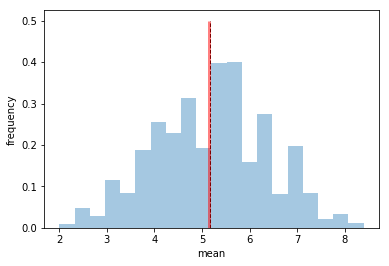

In [5]:
plt.hist(sample_mean, bins=20, density=True, alpha=0.4) # bins(option): 棒の数を指定
plt.xlabel("mean")
plt.ylabel("frequency")

# 標本平均を示す縦線（黒破線）の描画
plt.vlines(x=np.mean(sample_mean), ymin=0, ymax=0.5, linestyles='dashed', linewidths=1)
# 母平均を示す縦線（赤実線）の描画
plt.vlines(x=p_mean, ymin=0, ymax=0.5, linestyles='solid', linewidths=3, color="r",alpha=0.5);

+ **標本分散と不偏分散に関するヒストグラムの作成・描画**

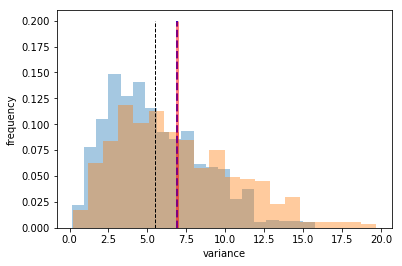

In [6]:
foo = np.vstack((sample_Uvar,sample_var)).T
# 不偏分散のヒストグラム（オレンジ）
plt.hist(foo[:,1], bins=20, density=True, alpha=0.4) # bins(option): 棒の数を指定
# 標本分散のヒストグラム（薄青色）
plt.hist(foo[:,0], bins=20, density=True, alpha=0.4) # bins(option): 棒の数を指定
plt.xlabel("variance")
plt.ylabel("frequency")

# 標本分散を示す縦線（黒破線）の描画
plt.vlines(x=np.mean(sample_var), ymin=0, ymax=0.2, linestyles='dashed', linewidths=1)
# 不偏分散を示す縦線（青破線）の描画
plt.vlines(x=np.mean(sample_Uvar), ymin=0, ymax=0.2, linestyles='dashed', linewidths=2, color="b")
# 母分散を示す縦線（赤実線）の描画
plt.vlines(x=p_var, ymin=0, ymax=0.2, linestyles='solid', linewidths=3, color="r",alpha=0.5);